In [1]:
import numpy as np
import pandas as po
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from utils import PearsonCorrelation

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [6]:
df = po.read_csv('data/EnergyConsumption_Theft.csv')

In [7]:
len(df)

42372

In [8]:
df = df.sample(frac=1).reset_index(drop = True)

In [9]:
df

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,CE5CEF83E9CA38B8EBDAF3AA9A55175D,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,18.42,15.37,14.50,14.87,17.490000,17.42,15.60,17.76,16.00,18.41
1,620112CA8E0824AAA0A6540C0B13071E,0,5.53,3.79,3.19,4.85,4.12,3.25,3.04,3.55,...,6.28,5.23,13.69,6.84,15.000911,7.14,12.33,12.43,6.24,6.14
2,EC4875DEA808B7B9FBE7C88691FADC1C,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00
3,6D3A1F97DBB38D554D5CDF7723B4725F,0,5.82,9.89,6.63,12.61,11.00,15.34,13.25,9.61,...,3.74,1.36,1.87,4.91,1.830000,1.23,1.29,1.56,0.91,0.93
4,EA0E94ADA62F1A7BE72A00E0E2FBFBCB,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.16,4.22,4.36,4.61,4.570000,4.10,4.30,3.98,4.29,4.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,3E59D25067C6C216E5A7F922078361A3,1,5.28,9.96,3.17,1.98,3.56,2.71,1.81,2.03,...,2.31,3.69,9.45,7.23,8.530000,7.93,7.05,9.48,7.33,6.36
42368,B391339D6F6D5E58B31EEEF295DEDCE7,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,9.76,8.84,10.51,9.08,11.010000,10.84,10.93,10.79,9.82,10.79
42369,757AC72204EC6C63E1F68E79EB27E43E,0,0.00,0.00,0.00,0.00,3.22,4.52,3.91,4.96,...,3.46,3.73,3.86,4.51,4.490000,5.11,5.41,4.39,4.17,5.02
42370,9E662A1C9CC7BEBD4969E8F8527BC5DE,1,4.90,4.49,4.85,4.13,4.93,5.20,3.84,3.69,...,1.85,3.70,3.87,3.69,4.140000,3.67,4.31,4.47,3.78,4.13


In [10]:
df = df.drop(['CONS_NO'], axis = 1)

In [11]:
'''
df_train = df[:32000]
df_val = df[32000:37000].reset_index(drop = True)
df_test = df[37000:].reset_index(drop = True)
'''

'\ndf_train = df[:32000]\ndf_val = df[32000:37000].reset_index(drop = True)\ndf_test = df[37000:].reset_index(drop = True)\n'

In [12]:
X = df.drop(['FLAG'], axis = 1)
y = df['FLAG']

In [4]:
X_train = X[:32000].values.reshape(-1, len(X.columns), 1)
X_val = X[32000:37000].values.reshape(-1, len(X.columns), 1)
X_test = X[37000:].values.reshape(-1, len(X.columns), 1)

NameError: name 'X' is not defined

In [14]:
y_train = y[:32000].values.reshape(-1, 1, 1)
y_val = y[32000:37000].values.reshape(-1, 1, 1)
y_test = y[37000:].values.reshape(-1, 1, 1)

In [15]:
X_train.shape

(32000, 1034, 1)

In [16]:
model = tf.keras.Sequential()

In [17]:
model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 30, activation='relu', input_shape=(len(X.columns), 1)))
model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 30, activation='relu'))
model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 30, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1005, 64)          1984      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 976, 64)           122944    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 947, 64)           122944    
_________________________________________________________________
flatten (Flatten)            (None, 60608)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 60609     
Total params: 308,481
Trainable params: 308,481
Non-trainable params: 0
_________________________________________________________________


In [19]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-8, momentum=0.9, nesterov=True)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=4)
loss_funk = tf.keras.losses.MeanSquaredError(reduction='sum_over_batch_size')

In [20]:
model.compile(optimizer = sgd, loss = loss_funk)

In [21]:
history = model.fit(X_train, y_train, batch_size = 256, epochs = 100, validation_data = (X_val, y_val), callbacks=[earlystop], verbose=1)

Epoch 1/100
125/125 [==============================] - 8s 67ms/step - loss: 0.0880 - val_loss: 0.0822
Epoch 2/100
125/125 [==============================] - 8s 66ms/step - loss: 0.0863 - val_loss: 0.0822
Epoch 3/100
125/125 [==============================] - 8s 67ms/step - loss: 0.0863 - val_loss: 0.0822
Epoch 4/100
125/125 [==============================] - 9s 68ms/step - loss: 0.0863 - val_loss: 0.0822
Epoch 5/100
125/125 [==============================] - 9s 68ms/step - loss: 0.0863 - val_loss: 0.0822


In [22]:
y_pred = model.predict(X_val)

In [23]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [24]:
np.sum(y_pred)

9.696425e-06

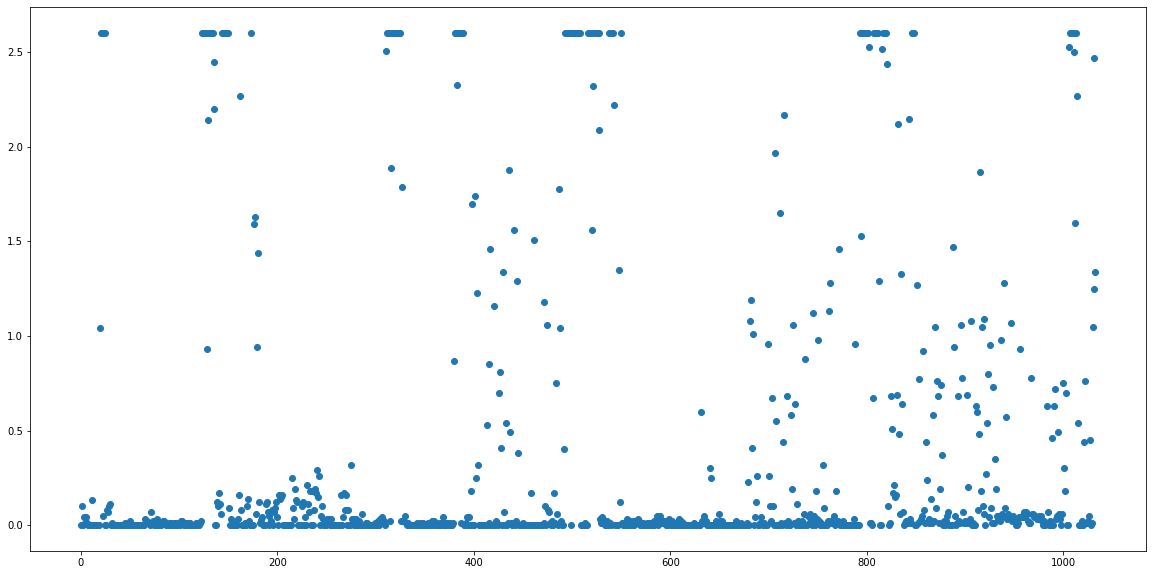

In [43]:
plt.figure(figsize = (20, 10))
plt.scatter(range(len(df.iloc[34][2:])), df.iloc[34][2:])

 33%|███▎      | 334/999 [00:00<00:00, 673.25it/s]/home/varun/Desktop/Projects/Energy_Theft/utils.py:18: RuntimeWarning: invalid value encountered in double_scalars
  return (cov/(std_x*std_y))
100%|██████████| 999/999 [00:00<00:00, 1030.92it/s]


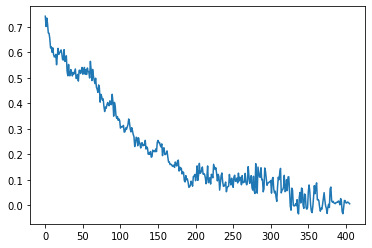

 33%|███▎      | 331/999 [00:00<00:01, 663.82it/s]/home/varun/Desktop/Projects/Energy_Theft/utils.py:18: RuntimeWarning: invalid value encountered in double_scalars
  return (cov/(std_x*std_y))
100%|██████████| 999/999 [00:00<00:00, 1037.33it/s]


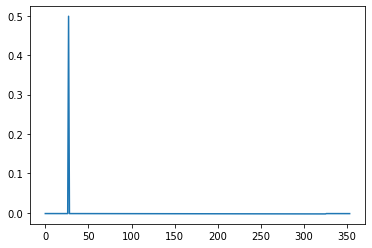

100%|██████████| 999/999 [00:00<00:00, 1066.79it/s]


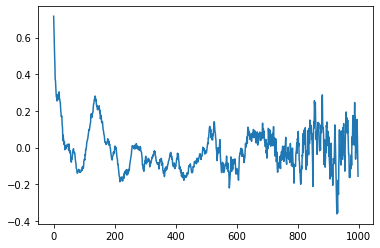

  0%|          | 0/999 [00:00<?, ?it/s]/home/varun/Desktop/Projects/Energy_Theft/utils.py:18: RuntimeWarning: invalid value encountered in double_scalars
  return (cov/(std_x*std_y))
100%|██████████| 999/999 [00:00<00:00, 1056.85it/s]


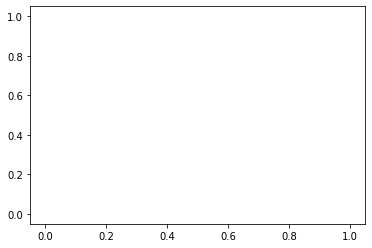

100%|██████████| 999/999 [00:00<00:00, 1070.27it/s]


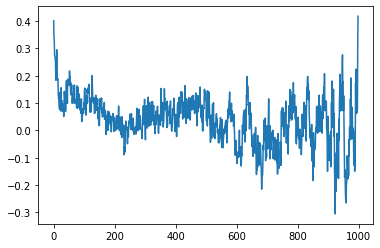

In [44]:
for i in range(5):
    D = df.iloc[i][2:].values
    
    auto_corrs = []
    for i in tqdm(range(1, 1000)):
        a_c = PearsonCorrelation(D[:-i], D[i:])

        auto_corrs.append(a_c)
    
    plt.plot(auto_corrs)
    plt.show()    